Akurasi: 1.0
[[2 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Prediksi: [1]
Koefisien: [[0.11648941 0.5825963  0.35254741]]
Intercept: [-68.55350685]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


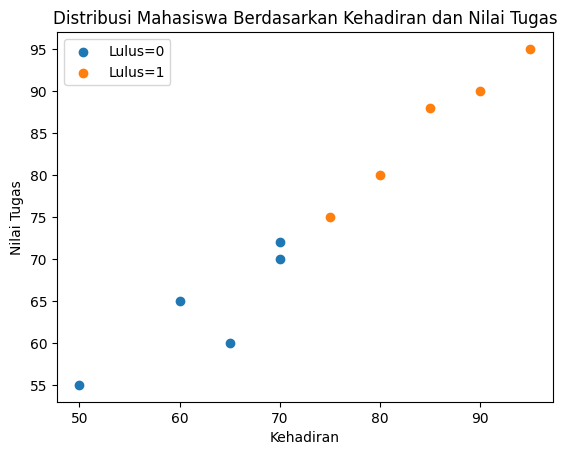

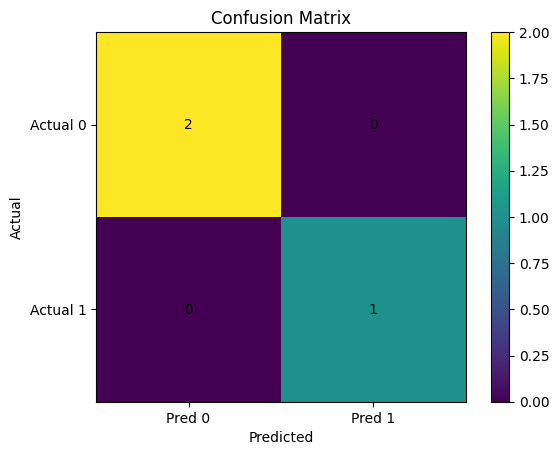

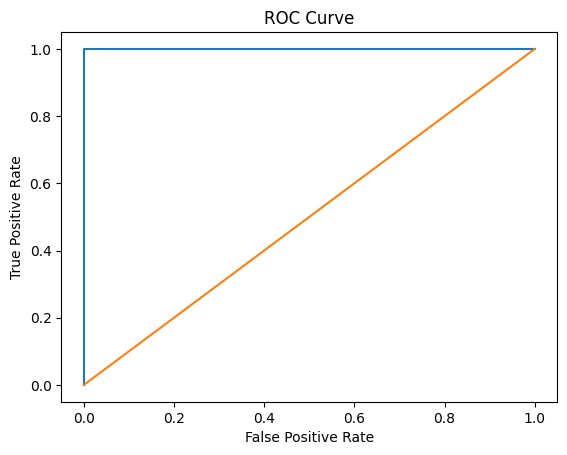

AUC: 1.0


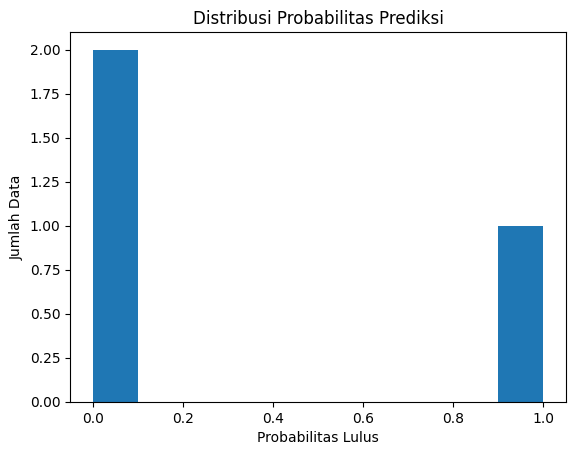

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# DATASET
data = {
    'jam_belajar': [2, 3, 4, 5, 6, 1, 2, 7, 8, 3],
    'kehadiran': [60, 70, 75, 80, 90, 50, 65, 95, 85, 70],
    'nilai_tugas': [65, 70, 75, 80, 90, 55, 60, 95, 88, 72],
    'lulus': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df
# SPLIT DATA
X = df[['jam_belajar', 'kehadiran', 'nilai_tugas']]
y = df['lulus']

# Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

data_baru = np.array([[4, 80, 78]])
prediksi = model.predict(data_baru)

print("Prediksi:", prediksi)
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

# Visualisasi Distribusi Data
plt.figure()

for label in df['lulus'].unique():
    subset = df[df['lulus'] == label]
    plt.scatter(
        subset['kehadiran'],
        subset['nilai_tugas'],
        label=f"Lulus={label}"
    )

plt.xlabel("Kehadiran")
plt.ylabel("Nilai Tugas")
plt.title("Distribusi Mahasiswa Berdasarkan Kehadiran dan Nilai Tugas")
plt.legend()
plt.show()

# Visualisasi Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0, 1], ['Pred 0', 'Pred 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC:", roc_auc)

# Visualisasi Probabilitas Prediksi
plt.figure()
plt.hist(y_prob)
plt.xlabel("Probabilitas Lulus")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Probabilitas Prediksi")
plt.show()
